
# Logistic Regression with Python

we will be working with the ```Titanic Data Set```.

It includes passenger information like name, age, gender, socio-economic class, etc. 

We want to build a model to predict a classification survival or deceased based on a specific set of features.

We will implement Logistic Regression in Python for classification.

We'll use a "semi-cleaned" version of the titanic data set but you may need to do some additional cleaning .

## Import Libraries

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rc("font", size=18)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

## The Data

Let's start by reading in the titanic_train.csv file into a pandas dataframe.

In [109]:
data = pd.read_csv('titanic.csv')

- survival - Survival (0 = No; 1 = Yes)
- class - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- name - Name
- sex - Sex
- age - Age
- sibsp - Number of Siblings/Spouses Aboard
- parch - Number of Parents/Children Aboard
- ticket - Ticket Number
- fare - Passenger Fare
- cabin - Cabin
- embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)


In [110]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [111]:
data.shape

(891, 12)

# Exploratory Data Analysis and Feature Engineering

##### Show the distribution of the classes

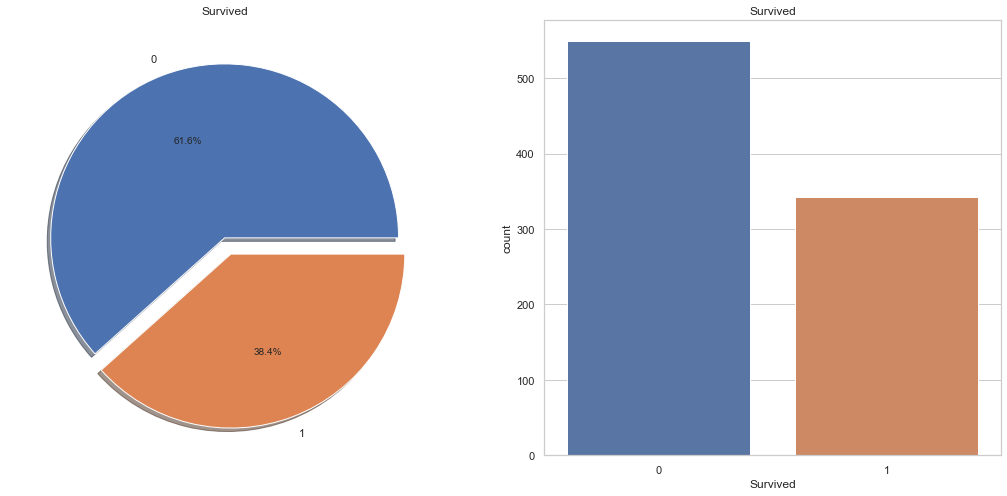

In [7]:
f,ax=plt.subplots(1,2,figsize=(18,8))

# PUT YOUR CODE HERE

In [112]:
Surv=data.groupby('Survived').PassengerId.count()
Surv

Survived
0    549
1    342
Name: PassengerId, dtype: int64

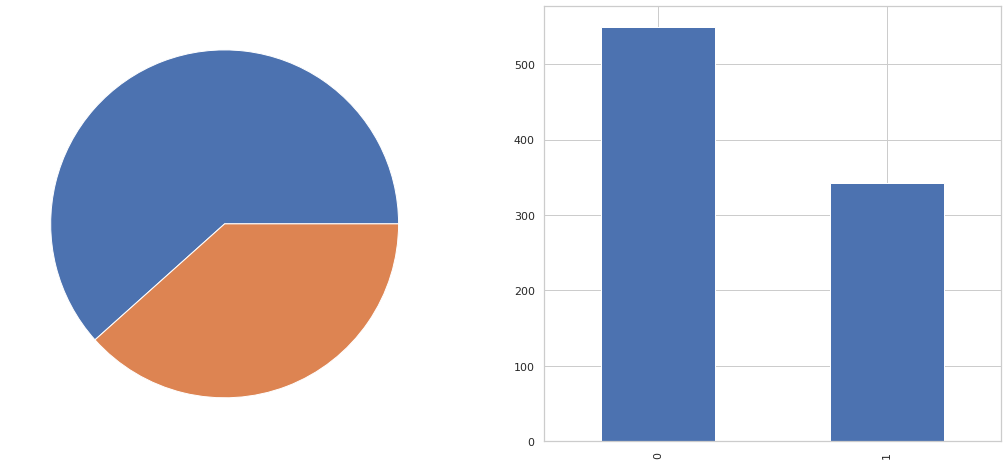

In [113]:
f,ax=plt.subplots(1,2,figsize=(18,8))

ax[0].pie(Surv)
data['Survived'].value_counts().plot.bar(ax=ax[1])

Not many passengers survived the accident.

## Missing Data

Look for missing data and then you will perform imputation where you think it makes sense.


##### There are missing value in our dataset? Explain how you think to manage them and why. Possible option could be:

- remove columns containing missing data;
- mputation of missing data with some criteria;
- any other idea?

In [114]:
# check missing values in the data
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [115]:
(data.isnull().sum()/data.PassengerId.count()).round(2)

PassengerId    0.00
Survived       0.00
Pclass         0.00
Name           0.00
Sex            0.00
Age            0.20
SibSp          0.00
Parch          0.00
Ticket         0.00
Fare           0.00
Cabin          0.77
Embarked       0.00
dtype: float64

In [66]:

print('Percent of missing data in column "Age" is',age_missing )


Percent of missing data in column "XXX" is ...


- Around 20 percent of the Age data is missing. This percentage is not so high, we can fill the missing age through imputation.

- Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this coulumn later.


##### Analyse the Age column, in general and separately for each class

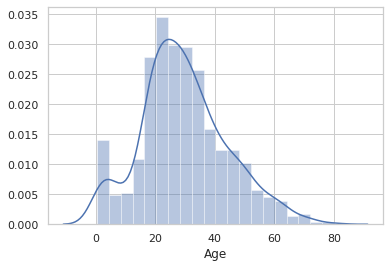

In [116]:
#Put your code here
sns.distplot(data.Age.dropna())

In [117]:
data.groupby('Age').Age.count()

Age
0.42     1
0.67     1
0.75     2
0.83     2
0.92     1
        ..
70.00    2
70.50    1
71.00    2
74.00    1
80.00    1
Name: Age, Length: 88, dtype: int64

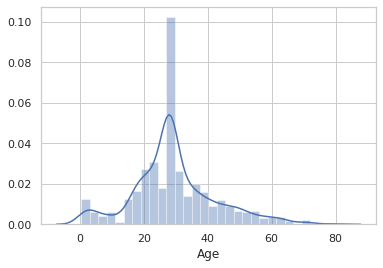

In [118]:
sns.distplot(data.Age.fillna(data.Age.median()))

##### If the age column would contain any missing value, considering that "Age" is (right) skewed, do you it would be a good idea to use the mean to fill in the missing values in this specific column? Or would you use any other values?




 Reply here 
 
 
 
 
 

Text(0.5, 1.0, 'Survived')

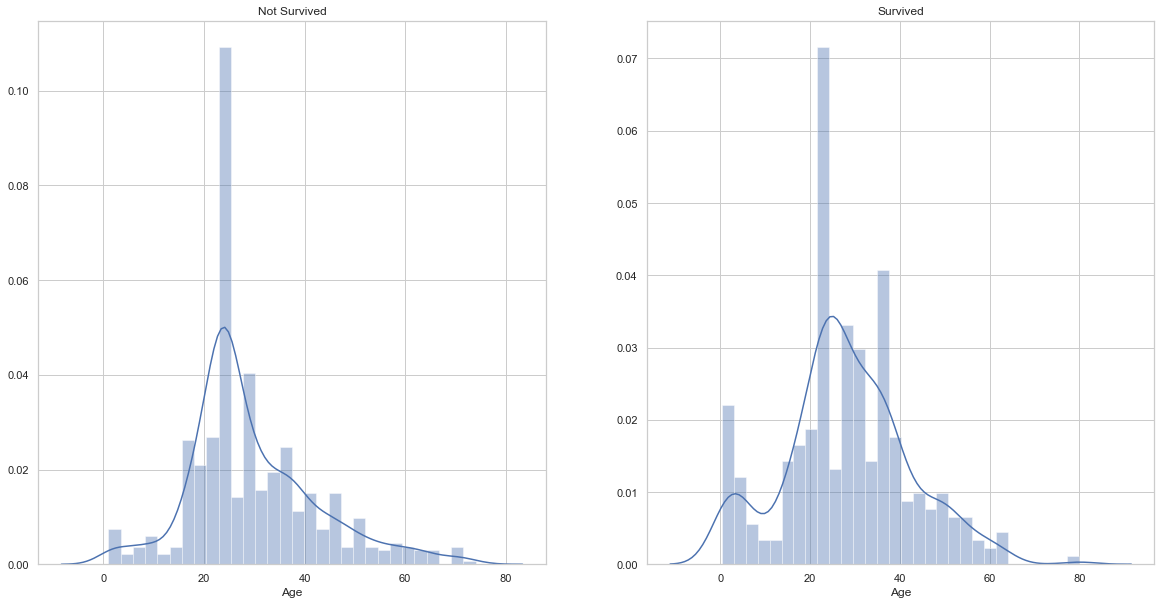

In [43]:
f,ax=plt.subplots(1,2,figsize=(20,10))

# Not Survived Plot
ax[0].set_title('Not Survived')

# Survived Plot
ax[1].set_title('Survived')

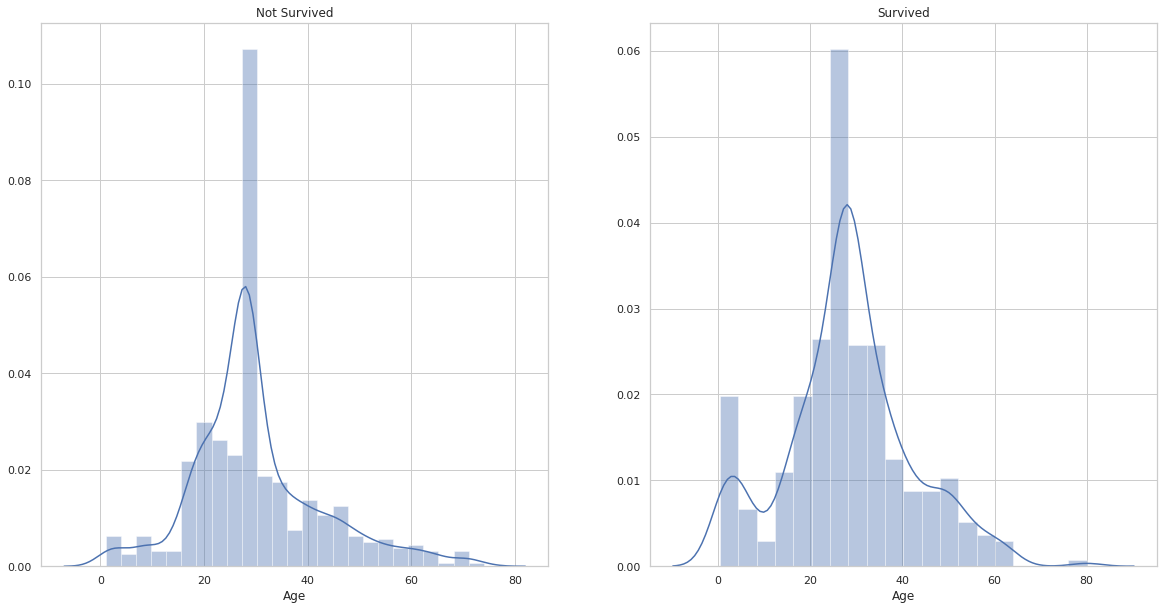

In [119]:
f,ax=plt.subplots(1,2,figsize=(20,10))
data=data.fillna(data.median())
Surv=data[data['Survived']==1]
NotSurv=data[data['Survived']==0]

# Not Survived Plot
ax[0].set_title('Not Survived')
sns.distplot(NotSurv.Age,ax=ax[0])

# Survived Plot
ax[1].set_title('Survived')
sns.distplot(Surv.Age,ax=ax[1])


What can we observe from the above plots?
Have more chances to survive children, young people or elder? 


Reply here 

#### Gender

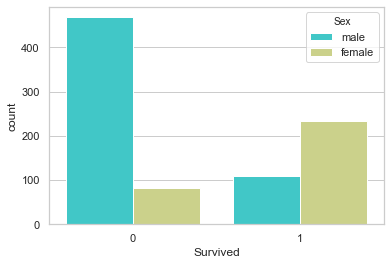

In [13]:

# Put your code here

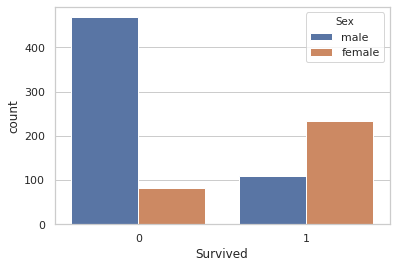

In [146]:
sns.countplot('Survived',data=data,hue='Sex')

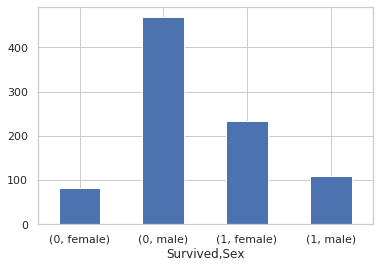

In [127]:
GenSuv=data.groupby(['Survived','Sex']).PassengerId.count()
GenSuv.plot.bar(rot=0)

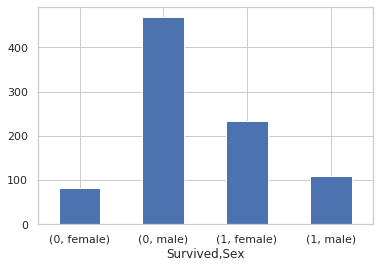

In [145]:
GenSuv.keys()
GenSuv.reset_index().set_index('Survived')
GenSuv.plot.bar(rot=0)

Who has more chances to survive between women an men?

##### PClass

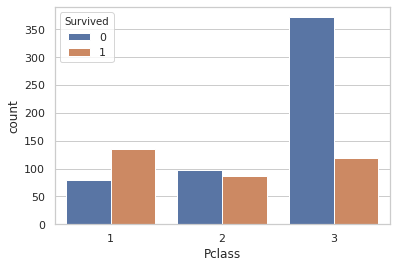

In [148]:
# Put your code here
sns.countplot('Pclass',data=data,hue='Survived')

Does the class affect on the possibility to survive?

In [ ]:
Reply here

##### SibSip: This feature represents whether a person is alone or with his family members.

Text(0, 0.5, 'Percentage of survived')

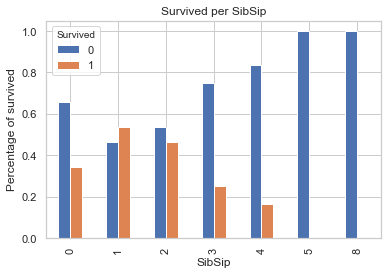

In [15]:
# Put you code here

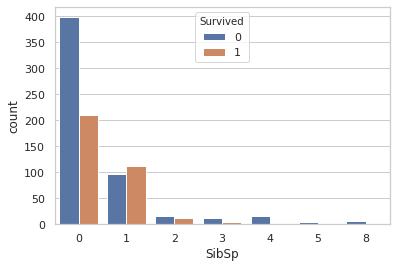

In [166]:
sns.countplot('SibSp',data=data,hue='Survived')

In [173]:
ch=pd.crosstab(data.SibSp,data.Survived,normalize='index')
ch

Survived,0,1
SibSp,,
0,0.654605,0.345395
1,0.464115,0.535885
2,0.535714,0.464286
3,0.750000,0.250000
4,0.833333,0.166667
5,1.000000,0.000000
8,1.000000,0.000000


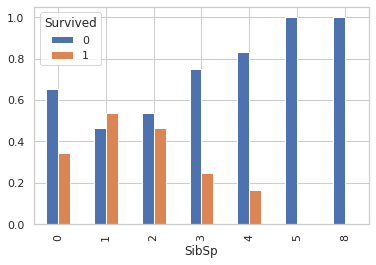

In [176]:
ch.plot.bar()

Do passengers have more chance to survive if they travel alone or with many people?

##### Distribution of ages per class and for survived and not survived

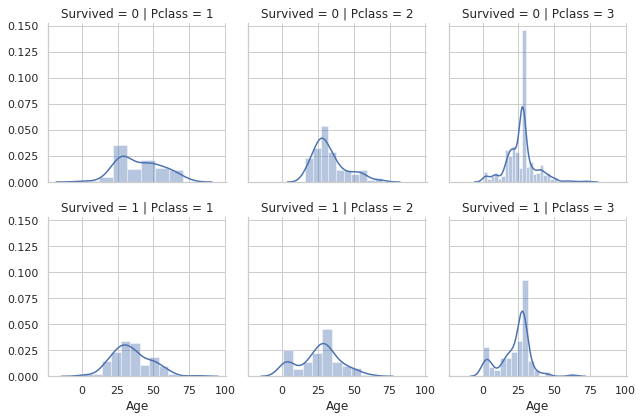

In [177]:
g = sns.FacetGrid(data, row='Survived', col='Pclass')
g.map(sns.distplot, "Age")
plt.show()

## Data preprocessing

**Feature Engineering plays an important role in regards to the performance of Logistic**

We want to fill in missing age data instead of just dropping the missing age data rows. 

In case of missing value we will assign the median value of the passengers in the same class.


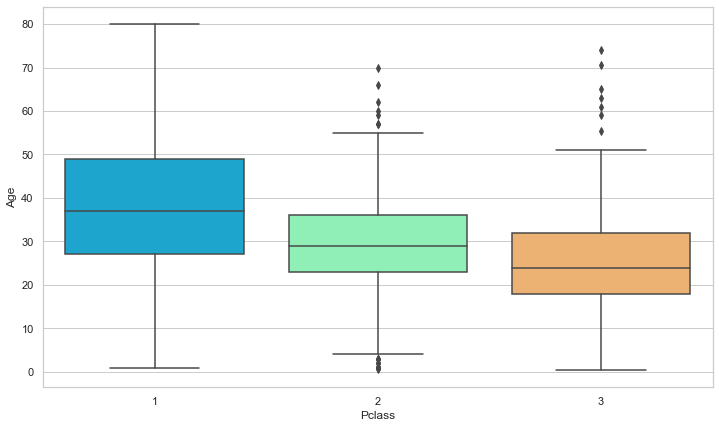

In [18]:
# Put your code here


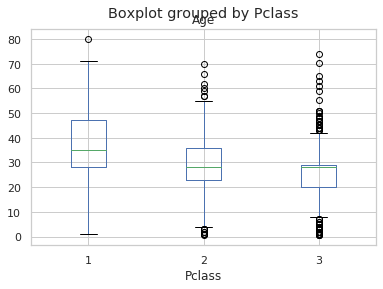

In [179]:
data.boxplot(column='Age',by='Pclass')

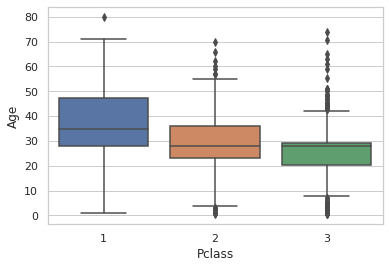

In [180]:
sns.boxplot(x='Pclass',y='Age',data=data)

Compute the median age per class

In [19]:
# Put your code here

,Pclass,Age
0,1,37.0
1,2,29.0
2,3,24.0


In [181]:
data.groupby('Pclass').Age.mean()

Pclass
1    36.812130
2    29.765380
3    25.932627
Name: Age, dtype: float64

##### Use these age values to impute based on Pclass for Age.

In [20]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:
        return Age

##### Apply that function

In [21]:
# Put your code here

Let's check again missin values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


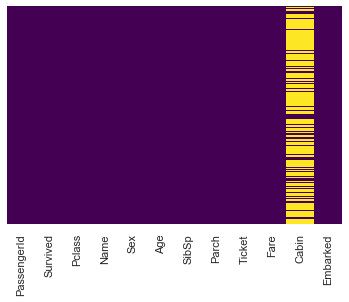

In [182]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Drop the Cabin column 

In [23]:
# Put your code here

In [24]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [185]:
data=data.drop('Cabin',axis=1)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [183]:
data.keys()

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

There are only 2 missing values for "Embarked", so we can just impute with the port where most people boarded.

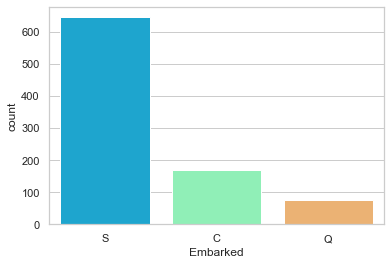

In [27]:
# Put your code here

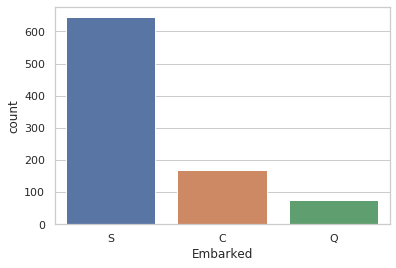

In [186]:
sns.countplot('Embarked',data=data)

The most passengers boarded in Southhampton, so we'll impute those 2 NaN's with "S".

In [28]:
# Put your code here

In [187]:
data.Embarked=data.Embarked.fillna('S')

In [188]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Converting Categorical Features 

Convert categorical variable into **dummy/indicator** variables otherwise our machine learning algorithm won't be able to directly take in those features as inputs.

In [189]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Embarked       891 non-null object
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [190]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [197]:
data['Sex_male']=[1 for x if: x=='male' else 0]

SyntaxError: invalid syntax (<ipython-input-197-85bb9fc0424c>, line 1)

In [30]:

# Put your code here

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,1,0,1,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,0,0,0,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,0,0,1,0,1


##### Drop those feature that in your opinion are not relevant for the model and explain why they are not relevant

In [31]:
# Put your code here

In [32]:
data.head()

,Survived,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,Pclass_2,Pclass_3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1


Great! Our data is ready for our model!

# Building a Logistic Regression model

Let's start by splitting our data into a training set and test set. Use 30% of the data as test set and set random_state=101

## Train Test Split

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
X_train, X_test, y_train, y_test = # Put your code here

## Training and Predicting

In [35]:
from sklearn.linear_model import LogisticRegression

In [36]:
logmodel = # Put your code here


# Train the model
logmodel.# Put your code here

/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

##### Compute the predictions on the test set

In [37]:
predictions = # Put your code here

## Model Evaluation

We can check **precision, recall, f1-score** using classification report!

In [38]:
from sklearn.metrics import classification_report


In [39]:
# Put your code here

              precision    recall  f1-score   support

           0       0.78      0.90      0.83       154
           1       0.82      0.65      0.73       114

    accuracy                           0.79       268
   macro avg       0.80      0.77      0.78       268
weighted avg       0.80      0.79      0.79       268



You might want to explore other feature engineering and check if the model improves.

Example of feature engineering you could try:

* Create age groups
* From SibSip creaate a binary column ```Alone```
* Try grabbing the Title (Dr.,Mr.,Mrs,etc..) from the name as a feature
* ...
* BE CREATIVE!